## Machine Learning Hackathon

## Problem Statement: Credit Default Model

You are hired as a data scientist at a leading consumer loan provider in the country. The organization has been relying on the information from the credit bureaus to determine the eligibility and the risk profile of the clients, however the organization feels that they need a more robust model to determine whether a loan will default or not. Organization plans to use a mix of client's demographic details, loan details and credit bureau information to create this model.
You are provided with the historical data of the loans disbursed in the previous years along with the information on whether there was a default on the loan and your task is to come up with a model which would be able to predict the loan defaults.

### Data Description
 - train.csv – data for 79,203 loans disbursed by the organization
 - test.csv – unlabelled data for 19,873 loans
 - sample_submission.csv – submission template
 
## Evaluation Metric

The solution will be evaluated based on the following parameters:

• Exploratory data analysis and insights from the data (10 points)

• F1 score of the model (10 points) [sklearn.metrics.f1_score()]

• Presentation (5 points)

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [455]:
# load and preview the dataset

data = pd.read_csv("C:\\Users\\sumajhi\\Desktop\\data\\train.csv")


## Total number of features available , Missing values , their datatypes and their Types 

In [457]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          79210 non-null  int64  
 1   disbursed_amount                     79210 non-null  int64  
 2   asset_cost                           79210 non-null  int64  
 3   ltv                                  79210 non-null  float64
 4   branch_id                            79210 non-null  int64  
 5   supplier_id                          79210 non-null  int64  
 6   manufacturer_id                      79210 non-null  int64  
 7   current_pincode_id                   79210 non-null  int64  
 8   date_of_birth                        25911 non-null  object 
 9   employment_type                      76294 non-null  object 
 10  disbursaldate                        79185 non-null  object 
 11  state_id                    

In [459]:
data.head()

,customer_id,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,278331,33454,81230,41.34,64,23682,86,6577,NaN,Salaried,...,0,0,0,0,0,0,0,0,0,0
1,273442,38519,83511,48.32,8,23388,45,5657,01-01-1987,Self employed,...,0,0,0,0,0,0,0,0,0,0
2,135417,48647,68297,78.54,16,18059,86,2946,NaN,Self employed,...,0,0,0,0,0,0,0,0,0,1
3,218865,43775,60398,70.82,104,24132,86,7296,01-01-1980,Self employed,...,0,0,0,0,0,0,0,0,0,0
4,195543,45145,62650,74.29,65,22871,120,997,01-01-1990,Salaried,...,0,0,0,0,0,0,0,0,0,0


In [461]:
data.shape

(79210, 41)

In [462]:
data.describe()

,customer_id,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,...,7.921000e+04,7.921000e+04,7.921000e+04,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000
mean,311205.514468,54373.342608,75113.071165,75.337312,72.408383,19489.261015,70.093094,3342.542621,7.159058,1531.144679,...,6.105680e+03,5.398753e+03,1.109649e+04,121.262315,0.384926,0.095013,8.590683,16.088688,0.178298,0.203156
std,108506.933745,12693.243730,17424.375193,11.285616,68.703384,3508.666653,22.476729,2188.088812,4.431790,968.860853,...,1.138702e+05,9.955199e+04,9.316931e+04,3676.676815,0.936074,0.383327,13.373491,27.017550,0.636051,0.402350
min,123460.000000,13990.000000,38116.000000,19.570000,1.000000,12312.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217297.750000,47151.750000,65832.000000,69.670000,15.000000,16294.000000,48.000000,1511.000000,4.000000,700.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,311293.000000,53803.000000,70708.000000,77.320000,63.000000,18694.000000,86.000000,2949.000000,6.000000,1427.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,404711.750000,60447.000000,78110.000000,84.140000,121.000000,22980.000000,86.000000,5437.000000,9.000000,2311.000000,...,0.000000e+00,0.000000e+00,1.950000e+03,0.000000,0.000000,0.000000,13.000000,24.000000,0.000000,0.000000
max,499996.000000,179176.000000,254177.000000,94.960000,261.000000,24779.000000,145.000000,7337.000000,22.000000,3780.000000,...,6.950353e+06,6.686746e+06,5.653513e+06,364153.000000,16.000000,7.000000,90.000000,166.000000,15.000000,1.000000


## Target feature and its distribution

In [466]:
data['loan_default'].value_counts()

0    63118
1    16092
Name: loan_default, dtype: int64

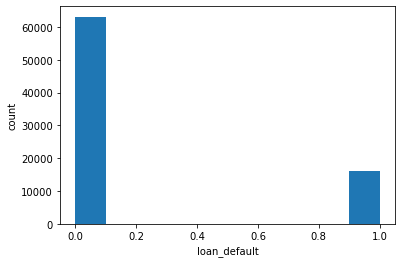

In [467]:
# distribution of loan default  charges

plt.hist(data['loan_default'])
plt.xlabel('loan_default')
plt.ylabel('count')
plt.show()


## Unique Values of Categorical Columns

In [469]:
print(data['employment_type'].value_counts())
#print(data['perform_cns_score_description'].value_counts())
#print(data['date_of_birth'].value_counts())

Self employed    44261
Salaried         32033
Name: employment_type, dtype: int64


## Explore Data

### 1. Hypothesis Generation 
Emplyment Type with Loan_default
cns score desc w with Loan_default

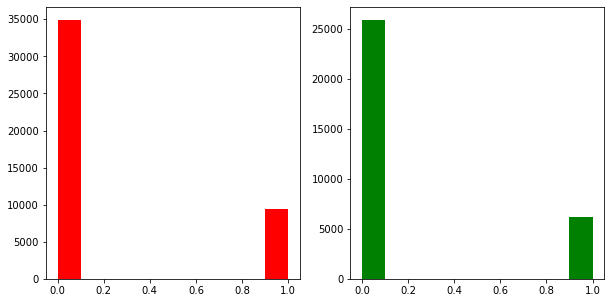

In [464]:
# distribution of loan dafaukt as per the employment type

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(data[(data['employment_type'] == "Self employed")]['loan_default'],color="red")

plt.subplot(122)
plt.hist(data[(data['employment_type'] == "Salaried")]['loan_default'],color="green")
plt.show()

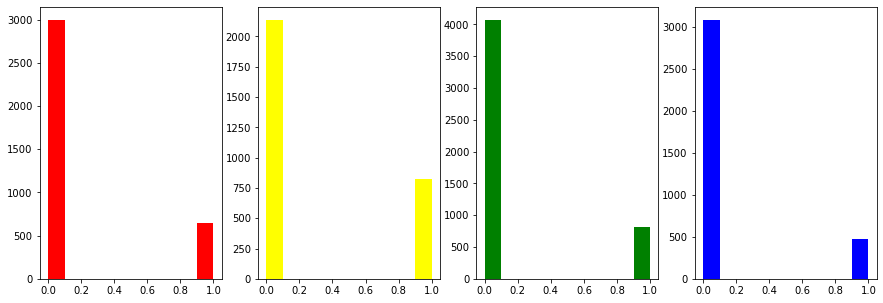

In [305]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.hist(data[(data['perform_cns_score_description'] == "F-Low Risk")]['loan_default'],color="red")

plt.subplot(142)
plt.hist(data[(data['perform_cns_score_description'] == "M-Very High Risk")]['loan_default'],color="yellow")

plt.subplot(143)
plt.hist(data[(data['perform_cns_score_description'] == "A-Very Low Risk")]['loan_default'],color="green")
plt.subplot(144)
plt.hist(data[(data['perform_cns_score_description'] == "D-Very Low Risk")]['loan_default'],color="blue")

plt.show()

## Univariate Analysis for all the numerical columns 

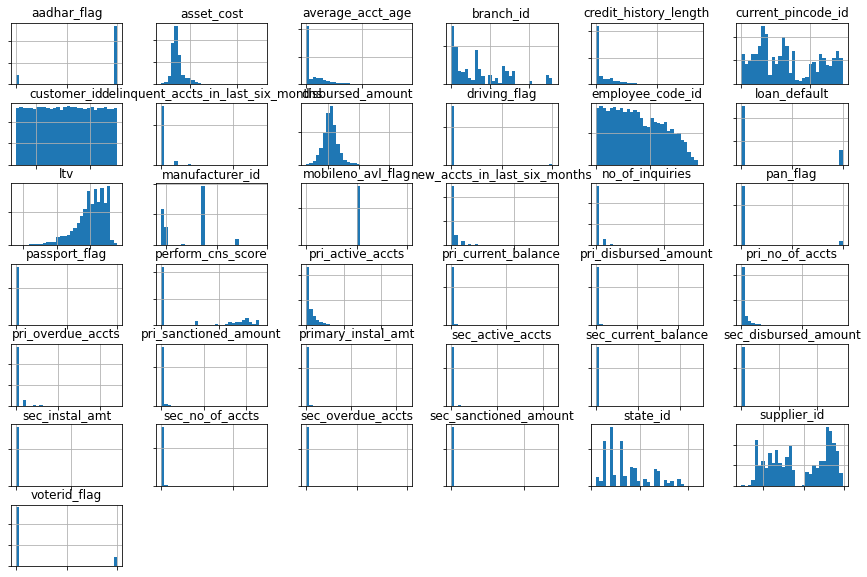

In [450]:
ax = data.hist(bins=30, figsize=(15, 10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])


In [470]:
data.boxplot([column='disbursed_amount'])

SyntaxError: invalid syntax (<ipython-input-470-a375288eb738>, line 1)

## For Categorical Columns 

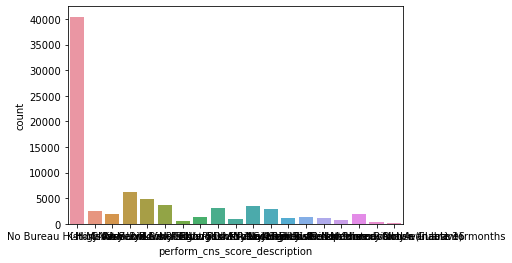

In [471]:
sns.countplot(data['perform_cns_score_description']);


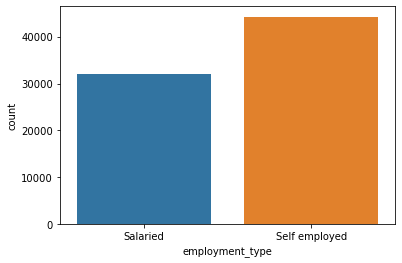

In [472]:
sns.countplot(data['employment_type']);


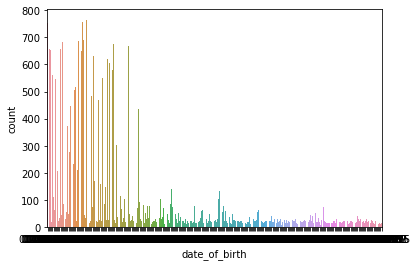

In [473]:
sns.countplot(data['date_of_birth']);


## Analysing relationship between Numerical and target 

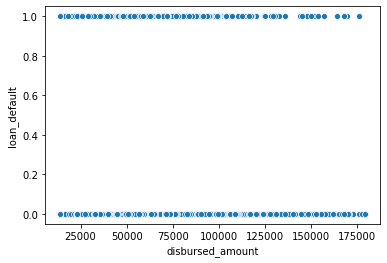

In [474]:
sns.scatterplot(x=data['disbursed_amount'], y=data['loan_default']);

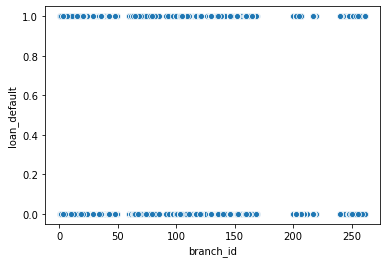

In [478]:
sns.scatterplot(x=data['branch_id'], y=data['loan_default']);

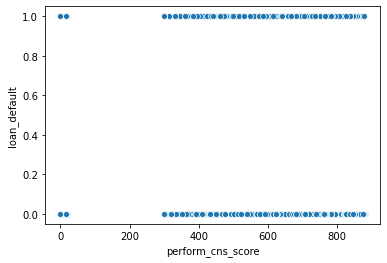

In [476]:
sns.scatterplot(x=data['perform_cns_score'], y=data['loan_default']);

In [482]:
 
categorical = [
  'employment_type', 'date_of_birth', 'perform_cns_score_description'
]

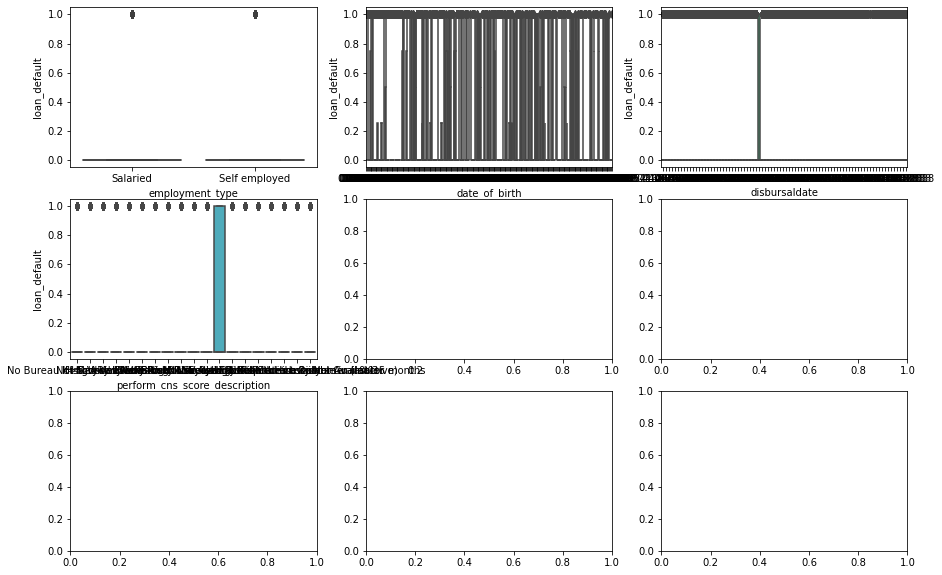

In [481]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='loan_default', data=data, ax=subplot)

## Handling Outliers 


In [191]:
Q1,Q3 = data['average_acct_age'].quantile([0.25,0.75])
IQR= Q3-Q1
print(IQR)
upper_range = Q3 + (1.5*IQR)
print(upper_range)
lower_range = Q3 + (1.5*IQR)
print(upper_range)

   
     

13.0
32.5
32.5


## Handling the Missing /Non null values for date_of_birth


In [484]:
print(data['date_of_birth'].isnull().sum())
print(data['disbursaldate'].isnull().sum())
print(data['employment_type'].isnull().sum())




53299
25
2916


In [485]:
mode_data =data['date_of_birth'].mode().values[0]
mode_datadisb =data['disbursaldate'].mode().values[0]
mode_emptype =data['employment_type'].mode().values[0]


In [486]:
data['date_of_birth'] = data['date_of_birth'].replace(np.nan,mode_data)
data['disbursaldate'] = data['disbursaldate'].replace(np.nan,mode_datadisb)
data['employment_type'] = data['employment_type'].replace(np.nan,mode_emptype)

In [487]:
print(data['date_of_birth'].isnull().sum())
print(data['disbursaldate'].isnull().sum())
print(data['employment_type'].isnull().sum())

0
0
0


## Fetaure Engineering 


In [488]:
#Date Encoding 
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])

#Create feature of day
data['day']= data['date_of_birth'].dt.day
#Create feature of month
data['month']= data['date_of_birth'].dt.month
#Create fetaure of year
data['year']= data['date_of_birth'].dt.year


#Drop date_of_birth Column 
data.drop(columns='date_of_birth',inplace=True)   

## Removing irrelevant columns 

In [489]:
#Remove the customer_id as it doesnt have  any add on value 
data.drop(columns=['customer_id'],inplace = True)


In [491]:
#Date Encoding 
data['disbursaldate'] = pd.to_datetime(data['disbursaldate'])

#Create feature of day
data['D_day']= data['disbursaldate'].dt.day
#Create feature of month
data['D_month']= data['disbursaldate'].dt.month
#Drop date_of_birth Column 
data.drop(columns='disbursaldate',inplace=True)   

In [116]:
#Handling duplicate columns 
duplicate = data.duplicated()
print(duplicate.sum())

0


## Label Encoding 

In [492]:
from sklearn.preprocessing import LabelEncoder

 
le = LabelEncoder()
le.fit(data['employment_type'])
data['employment_type'] = le.transform(data['employment_type'])

# One_Hot Encoding 

In [496]:
data['perform_cns_score_description'].replace("Not Scored: Not Enough Info available on the customer","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: Sufficient History Not Available","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: No Updates available in last 36 months","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: Only a Guarantor","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: No Activity seen on the customer (Inactive)","Not_Scored",inplace=True)


In [497]:
data['perform_cns_score_description'].value_counts()

No Bureau History Available    40439
C-Very Low Risk                 6207
A-Very Low Risk                 4882
F-Low Risk                      3643
D-Very Low Risk                 3560
Not_Scored                      3451
B-Very Low Risk                 3161
M-Very High Risk                2960
K-High Risk                     2550
I-Medium Risk                   1916
H-Medium Risk                   1901
G-Low Risk                      1431
E-Low Risk                      1430
J-High Risk                     1197
L-Very High Risk                 475
Name: perform_cns_score_description, dtype: int64

In [498]:
data =  pd.get_dummies(data,drop_first =True) 

## 1. Multicollinearlity in independent variables


In [500]:
#list of indepenedent and depenedent variable
x_cols = data.drop(columns='loan_default').copy()
y_cols=data['loan_default'].copy()
x_cols.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,employment_type,state_id,employee_code_id,...,perform_cns_score_description_F-Low Risk,perform_cns_score_description_G-Low Risk,perform_cns_score_description_H-Medium Risk,perform_cns_score_description_I-Medium Risk,perform_cns_score_description_J-High Risk,perform_cns_score_description_K-High Risk,perform_cns_score_description_L-Very High Risk,perform_cns_score_description_M-Very High Risk,perform_cns_score_description_No Bureau History Available,perform_cns_score_description_Not_Scored
0,33454,81230,41.34,64,23682,86,6577,0,13,1087,...,0,0,0,0,0,0,0,0,1,0
1,38519,83511,48.32,8,23388,45,5657,1,3,924,...,0,0,0,0,0,0,0,0,1,0
2,48647,68297,78.54,16,18059,86,2946,1,14,1127,...,0,0,0,0,0,0,0,0,1,0
3,43775,60398,70.82,104,24132,86,7296,1,13,1106,...,0,0,0,0,0,0,0,0,1,0
4,45145,62650,74.29,65,22871,120,997,0,6,2396,...,0,0,0,0,0,0,0,0,1,0


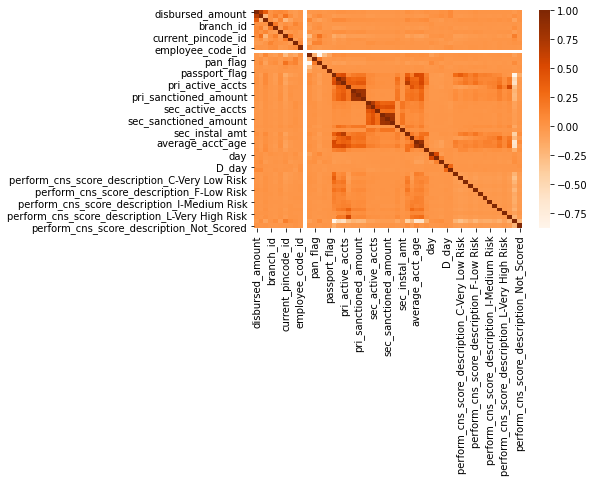

In [502]:

sns.heatmap(x_cols.corr(),cmap='Oranges')

In [501]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_cols.values, i) for i in range(x_cols.shape[1])]
vif["features"] = x_cols.columns

vif

,VIF Factor,features
0,4.735823,disbursed_amount
1,4.282196,asset_cost
2,2.715313,ltv
3,1.054805,branch_id
4,1.087220,supplier_id
5,1.026659,manufacturer_id
6,1.260402,current_pincode_id
7,1.061264,employment_type
8,1.062590,state_id
9,1.018607,employee_code_id


## Insignificant Columns as per VIF

In [504]:
insignificant_cols = ['mobileno_avl_flag','perform_cns_score','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_Not_Scored']


## Split the dataset 

In [505]:
# split the dataset in train and test set

X_train, X_test, y_train, y_test = train_test_split(x_cols,y_cols, test_size=0.25, random_state = 42)

In [506]:
# check the train and test set sizes
print(X_train.shape)
print(X_test.shape)

(59407, 55)
(19803, 55)


In [507]:
num_cols = ['asset_cost', 'branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id','employee_code_id','mobileno_avl_flag','aadhar_flag','pan_flag','voterid_flag','driving_flag','passport_flag','perform_cns_score','pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','pri_sanctioned_amount','pri_disbursed_amount','sec_no_of_accts','sec_active_accts','sec_overdue_accts','sec_current_balance','sec_sanctioned_amount','sec_disbursed_amount','primary_instal_amt','sec_instal_amt','new_accts_in_last_six_months','delinquent_accts_in_last_six_months','average_acct_age','credit_history_length','no_of_inquiries','day','month','year','D_day','D_month']

In [508]:
# scale the numerical variables use for loop for all the variables

from sklearn.preprocessing import StandardScaler

# create copy of X_train and x_test

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# for loop for scaling each numerical variable
for col in num_cols:
    scaler = StandardScaler()
    scaler.fit(X_train_scaled[col].values.reshape(-1,1))

    X_train_scaled[col] = scaler.transform(X_train_scaled[col].values.reshape(-1,1))
    X_test_scaled[col] = scaler.transform(X_test_scaled[col].values.reshape(-1,1))

# add constant to the scaled variables


In [509]:
X_train_scaled_constant = sm.add_constant(X_train_scaled)
X_test_scaled_constant = sm.add_constant(X_test_scaled)

In [512]:
# fit the model with only significant features
#insignificant_cols = ['mobileno_avl_flag','aadhar_flag','voterid_flag','perform_cns_score','perform_cns_score_description_Not_Scored']


logit_model1 = sm.Logit(y_train, X_train_scaled_constant.drop(columns=insignificant_cols)).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.489825
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                59407
Model:                          Logit   Df Residuals:                    59355
Method:                           MLE   Df Model:                           51
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                 0.03089
Time:                        08:55:02   Log-Likelihood:                -29099.
converged:                       True   LL-Null:                       -30027.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

In [289]:
significant_cols =['no_of_inquiries','year','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_L-Very High Risk','perform_cns_score_description_I-Medium Risk','D_day','perform_cns_score_description_J-High Risk','perform_cns_score_description_B-Very Low Risk','current_pincode_id','perform_cns_score_description_K-High Risk','employment_type','state_id','pri_no_of_accts','pri_active_accts','delinquent_accts_in_last_six_months','credit_history_length']

In [290]:
# fit the model with only significant features
logit_model1 = sm.Logit(y_train, X_train_scaled_constant[significant_cols]).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.539544
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                59407
Model:                          Logit   Df Residuals:                    59391
Method:                           MLE   Df Model:                           15
Date:                Sat, 19 Dec 2020   Pseudo R-squ.:                -0.06748
Time:                        15:46:37   Log-Likelihood:                -32053.
converged:                       True   LL-Null:                       -30027.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
no_of_inquirie

In [432]:
# build the model using sklearn
significant_cols =['sec_instal_amt','branch_id','perform_cns_score_description_D-Very Low Risk','disbursed_amount','ltv','current_pincode_id','state_id','employee_code_id','pri_no_of_accts','pri_active_accts','pri_overdue_accts','delinquent_accts_in_last_six_months','credit_history_length','no_of_inquiries','perform_cns_score_description_B-Very Low Risk','perform_cns_score_description_F-Low Risk','perform_cns_score_description_G-Low Risk','perform_cns_score_description_H-Medium Risk','perform_cns_score_description_I-Medium Risk','perform_cns_score_description_J-High Risk','perform_cns_score_description_K-High Risk','perform_cns_score_description_L-Very High Risk','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_M-Very High Risk']

lr = LogisticRegression()
lr.fit(X_train_scaled[significant_cols], y_train)

# predict the class and class probabilities on test set

y_test_pred = lr.predict(X_test_scaled[significant_cols])



In [401]:
y_test_pred_prob = lr.predict_proba(X_test_scaled[significant_cols])[:,1]

THRESHOLD = 0.5
preds = np.where(y_test_pred_prob > THRESHOLD, 1, 0)


In [402]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_test_pred, [1,0])

C:\Users\sumajhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[   11,  3982],
       [   10, 15800]], dtype=int64)

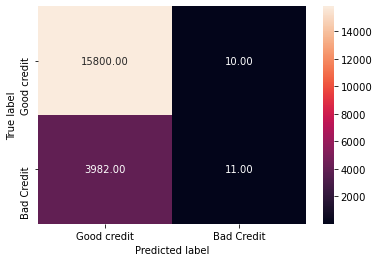

In [403]:
from sklearn import metrics 

def draw_cm( actual, predicted ):   
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    
    cm = [[tp,fn],[fp,tn]]
    
    sns.heatmap(cm, annot=True,fmt='.2f', 
               xticklabels = ["Good credit", "Bad Credit"] ,
               yticklabels = ["Good credit", "Bad Credit"] )   
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show()

draw_cm(y_test, y_test_pred)

In [405]:
# Measuring Accuracies-classification report

print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     15810
           1       0.52      0.00      0.01      3993

    accuracy                           0.80     19803
   macro avg       0.66      0.50      0.45     19803
weighted avg       0.74      0.80      0.71     19803



In [406]:
print(metrics.accuracy_score(y_test, y_test_pred))


0.7984143816593445


In [411]:
print(metrics.f1_score(y_test, y_test_pred))

0.005480817140009965


In [412]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]


In [414]:
for classifier in classifiers:
    model = classifier
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classifier)
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.f1_score(y_test,y_pred))
    print('*'*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     15810
           1       0.00      0.00      0.00      3993

    accuracy                           0.80     19803
   macro avg       0.40      0.50      0.44     19803
weighted avg       0.64      0.80      0.71     19803

0.0
**************************************************


C:\Users\sumajhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.80      0.89      0.85     15810
           1       0.23      0.13      0.17      3993

    accuracy                           0.74     19803
   macro avg       0.52      0.51      0.51     19803
weighted avg       0.69      0.74      0.71     19803

0.16523848019401777
**************************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     15810
           1       0.24      0.28      0.26      3993

    accuracy                           0.68     19803
   macro avg       0.52      0.53      0.52     19803
weighted avg       0.69      0.68      0.69     19803

0.2561542034370646
**************************************************
RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     15810
          

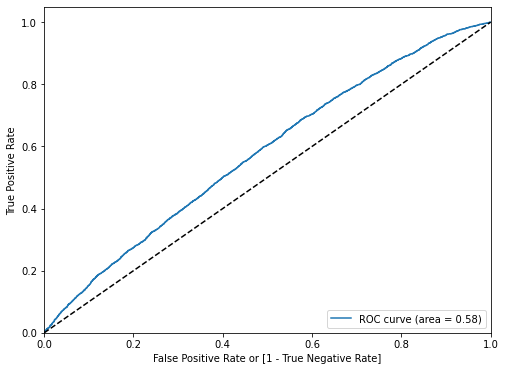

In [303]:
def draw_roc( actual, probs ): 
    
    # Obtain fpr,tpr and thresholds
    fpr,tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )   
    auc_score = metrics.roc_auc_score( actual, probs )    
    
    plt.figure(figsize=(8, 6))   
    # plot fpr,tpr  for various thresholds
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )    
    # Draw diagonal line from origin to extreme right top
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.xlim([0.0, 1.0])   
    plt.ylim([0.0, 1.05])   
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')   
    plt.ylabel('True Positive Rate')   
    plt.legend(loc="lower right")   
    plt.show()  
    return fpr, tpr, thresholds 

fpr, tpr, thresholds = draw_roc(y_test, y_test_pred_prob)

In [390]:

data_test = pd.read_csv("C:\\Users\\sumajhi\\Desktop\\data\\test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19818 non-null  int64  
 1   disbursed_amount                     19818 non-null  int64  
 2   asset_cost                           19818 non-null  int64  
 3   ltv                                  19818 non-null  float64
 4   branch_id                            19818 non-null  int64  
 5   supplier_id                          19818 non-null  int64  
 6   manufacturer_id                      19818 non-null  int64  
 7   current_pincode_id                   19818 non-null  int64  
 8   date_of_birth                        6573 non-null   object 
 9   employment_type                      19104 non-null  object 
 10  disbursaldate                        19813 non-null  object 
 11  state_id                    

In [391]:
mode_data_test =data_test['date_of_birth'].mode().values[0]
mode_datadisb_test =data_test['disbursaldate'].mode().values[0]
mode_emptype_test =data_test['employment_type'].mode().values[0]
mode_avg_test =data_test['average_acct_age'].mode().values[0]

data_test['date_of_birth'] = data_test['date_of_birth'].replace(np.nan,mode_data_test)
data_test['disbursaldate'] = data_test['disbursaldate'].replace(np.nan,mode_datadisb_test)
data_test['employment_type'] = data_test['employment_type'].replace(np.nan,mode_emptype_test)
data_test['average_acct_age'] = data_test['average_acct_age'].replace(np.nan,mode_avg_test)

print(data_test['employment_type'].isnull().sum())
print(data_test['disbursaldate'].isnull().sum())
print(data_test['date_of_birth'].isnull().sum())
print(data_test['average_acct_age'].isnull().sum())





0
0
0
0


In [392]:
#Date Encoding 
data_test['date_of_birth'] = pd.to_datetime(data_test['date_of_birth'])

#Create feature of day
data_test['day']= data_test['date_of_birth'].dt.day
#Create feature of month
data_test['month']= data_test['date_of_birth'].dt.month
#Create fetaure of year
data_test['year']= data_test['date_of_birth'].dt.year

#Date Encoding 
data_test['disbursaldate'] = pd.to_datetime(data_test['disbursaldate'])

#Create feature of day
data_test['D_day']= data_test['disbursaldate'].dt.day
#Create feature of month
data_test['D_month']= data_test['disbursaldate'].dt.month
#Create fetaure of year
data_test['D_year']= data_test['disbursaldate'].dt.year
#Drop date_of_birth Column 
data_test.drop(columns='date_of_birth',inplace=True)   
data_test.drop(columns='disbursaldate',inplace=True)   


In [393]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
le.fit(data_test['employment_type'])
data_test['employment_type'] = le.transform(data_test['employment_type'])




In [394]:
data_test['perform_cns_score_description'].replace("Not Scored: Not Enough Info available on the customer","Not_Scored",inplace=True)
data_test['perform_cns_score_description'].replace("Not Scored: Sufficient History Not Available","Not_Scored",inplace=True)
data_test['perform_cns_score_description'].replace("Not Scored: No Updates available in last 36 months","Not_Scored",inplace=True)
data_test['perform_cns_score_description'].replace("Not Scored: Only a Guarantor","Not_Scored",inplace=True)
data_test['perform_cns_score_description'].replace("Not Scored: No Activity seen on the customer (Inactive)","Not_Scored",inplace=True)


data_test =  pd.get_dummies(data_test,drop_first =True) 

In [395]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 57 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   customer_id                                                19818 non-null  int64  
 1   disbursed_amount                                           19818 non-null  int64  
 2   asset_cost                                                 19818 non-null  int64  
 3   ltv                                                        19818 non-null  float64
 4   branch_id                                                  19818 non-null  int64  
 5   supplier_id                                                19818 non-null  int64  
 6   manufacturer_id                                            19818 non-null  int64  
 7   current_pincode_id                                         19818 non-null  int64  
 8   employ

In [424]:
from sklearn.preprocessing import StandardScaler

# create copy of X_train and x_test

X_test_scaled_test = data_test.copy()

# for loop for scaling each numerical variable
for col in num_cols:
    scaler = StandardScaler()
    scaler.fit(X_test_scaled_test[col].values.reshape(-1,1))
    X_test_scaled_test[col] = scaler.transform(X_test_scaled_test[col].values.reshape(-1,1))

In [425]:
X_test_scaled_test_constant = sm.add_constant(X_test_scaled_test)

In [433]:
 

y_test_pred_test =  lr.predict(data_test[significant_cols])


In [435]:
print(y_test_pred_test)
 

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


In [439]:
sample = pd.read_csv('C:\\Users\\sumajhi\\Desktop\\data\\sample_submission.csv')
sample.head()

,customer_id,loan_default
0,461856,0
1,286869,0
2,274293,0
3,387987,0
4,214276,0


In [440]:
submission = pd.DataFrame({
    'customer_id': data_test['customer_id'],
    'loan_default': y_test_pred_test
})
submission.head()

,customer_id,loan_default
0,461856,1
1,286869,1
2,274293,1
3,387987,1
4,214276,1


In [441]:
submission.to_csv('C:\\Users\\sumajhi\\Desktop\\data\\submission.csv', index=False)

In [445]:
# build the model using sklearn
significant_cols =['sec_instal_amt','branch_id','perform_cns_score_description_D-Very Low Risk','disbursed_amount','ltv','current_pincode_id','state_id','employee_code_id','pri_no_of_accts','pri_active_accts','pri_overdue_accts','delinquent_accts_in_last_six_months','credit_history_length','no_of_inquiries','perform_cns_score_description_B-Very Low Risk','perform_cns_score_description_F-Low Risk','perform_cns_score_description_G-Low Risk','perform_cns_score_description_H-Medium Risk','perform_cns_score_description_I-Medium Risk','perform_cns_score_description_J-High Risk','perform_cns_score_description_K-High Risk','perform_cns_score_description_L-Very High Risk','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_M-Very High Risk']

dr = DecisionTreeClassifier()
dr.fit(X_train_scaled[significant_cols], y_train)

# predict the class and class probabilities on test set

y_test_pred_test = dr.predict(data_test[significant_cols])



In [446]:
submission = pd.DataFrame({
    'customer_id': data_test['customer_id'],
    'loan_default': y_test_pred_test
})
submission.head()

,customer_id,loan_default
0,461856,0
1,286869,1
2,274293,0
3,387987,0
4,214276,0


In [447]:
submission.to_csv('C:\\Users\\sumajhi\\Desktop\\data\\submission._decision.csv', index=False)